# Regression and Regularization

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_context('notebook')
sns.set_style('whitegrid')

In [2]:
# Load regression dataset for analysis 
from sklearn.model_selection import train_test_split 

data = pd.read_csv("data/concrete/concrete.csv")
X = data[[col for col in data.columns if col != "strength"]]
y = data["strength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Linear Regression

_Fit_ a linear model to supervised data by adjusting a set of coefficients, $w$ to minimize the residual sum of squares between the observed response and the prediction.

<dl style="float:left">
    <dt style="margin:12px 0">Linear Model</dt>
        <dd>$y=X\beta+\epsilon$</dd>
    <dt style="margin:12px 0">Objective Function</dt>
        <dd>$min_w\sum(Xw-y)^2$</dd>
    <dt style="margin:12px 0">Predictive Model</dt>
        <dd>$\hat{y}(w,x)=w_0+w_1x_1+...+w_px_p$</dd>
</dl>

<table style="float:left; margin-left:70px;">
    <thead>
        <th>Notation</th>
        <th>Description</th>
    </thead>
    <tbody>
        <tr>
            <td>$y$</td>
            <td>observed value</td>
        </tr>
        <tr>
            <td>$y$</td>
            <td>observed value</td>
        </tr>
        <tr>
            <td>$X$</td>
            <td>values of features</td>
        </tr>
        <tr>
            <td>$\beta$</td>
            <td>coefficients</td>
        </tr>
        <tr>
            <td>$\epsilon$</td>
            <td>noise or randomness in observation</td>
        </tr>
        <tr>
            <td>$w$</td>
            <td>weights</td>
        </tr>
        <tr>
            <td>$w_0$</td>
            <td>adjusts the decision plane in target space</td>
        </tr>
        <tr>
            <td>$\hat{y}$</td>
            <td>predicted value</td>
        </tr>
    </tbody>
</table>

<div style="clear: both"></div>

### Ordinary Least Squares

![OLS](figures/ordinary_least_squares.png)

### Normal Equation

$w = (X^TX)^{-1}X^Ty = X^+y$

One-step learning algorithm solved by linear algebra system of linear equations ($X^+y$ is called the pseudo-inverse of $X$). 

- No $\alpha$ to select (more on this shortly) 
- No iteration, computed in one step 
- Slow if $n$ is large (e.g. $n\geq10^4$)
- Computation of $(X^TX)^{-1}$ is slow
- $(X^TX)$ must be invertible 

In [3]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X, y)

/Users/benjamin/Workspace/ddl/navyfcu/venv/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Gradient Descent

![Gradient Descent](figures/gradient_descent.png)

$$h_\theta = \theta_0 + \theta_1x$$

### Gradient Descent

We _iteratively_ minimize our error by taking the derivative of the cost function to find the downward slope of $h_\theta$ until we converge - e.g. there is no downward direction, we reach a suitable error threshold, or we reach a maximum number of steps. For linear regression these derivatives are as follows:

$$\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^i)-y^i)$$
$$\theta_1 := \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^i)-y^i) \cdot x^i$$

- Guaranteed to converge 
- Works well with large $n$
- Need to do many iterations 
- How to choose $\alpha$?

In [4]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=5)
model.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

### Learning Rate

The hyperparameter $\alpha$ in gradient descent is called the _learning rate_. It determines how fast down the error curve we descend. The larger $\alpha$ is the faster we will minimize our cost function, however if $\alpha$ is too large or too small, we might not be able to find the true minimum of the cost function. 

![Learning Rate](figures/learning_rate.png)

## Polynomial Regression

![Polynomial Regression](figures/polynomial_regression.png)

### Polynomial Regression

In order to do higher order polynomial regression, we can use linear models trained on nonlinear functions of data via a mapping, $\phi$.

- Speed of linear model computation
- Fit a wider range of data or functions
- But remember: polynomials aren’t the only functions to fit


Consider the standard linear regression case:

$$\hat{y}(w,x) = w_0+\sum_{i=0}^n(w_ix_i)$$

The quadratic case (polynomial degree = 2) is:

$$\hat{y}(w,v,x) = w_0+\sum_{i=0}^n(w_ix_i)+\sum_{i=0}^n(v_ix_i^2)$$

We can simplify this by defining a _mapping_, $\phi$ that transforms our feature space:

$$\phi([x_0,...,x_n]) = [x_0,...,x_n,x_0^2,...,x_n^2]$$

At which point we can apply our standard linear models. 

In [5]:
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

model = Pipeline([
    ('quad', PolynomialFeatures(2)),
    ('regr', LinearRegression()), 
])
model.fit(X,y)

Pipeline(memory=None,
     steps=[('quad', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('regr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

## Residuals

The primary evaluation of regression models is based on the _residuals_ or error left over between the training data and final fitted model. An an analysis of residuals is the primary way we can view the behavior of models in high dimensional space. For example we want to look for:

- heteroskedasticity: different variability along the target variable 
- homoscedasticity: uniform variability along the entire target range 
- generalizability: does the range of our model conform with our expectations?

We'll explore this visually with:

- **Prediction Error Plot**: plots $\hat{y}$ against $y$, looking for closeness to 45 degree line. 
- **Residuals Plot**: plot the error against $y$, looking for closeness to 0 line. 

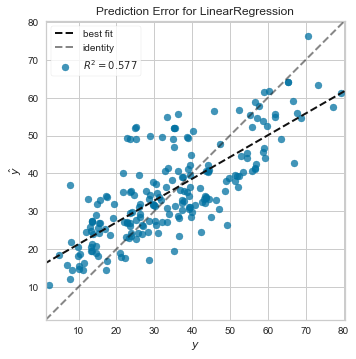

In [6]:
from yellowbrick.regressor import PredictionError

viz = PredictionError(LinearRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

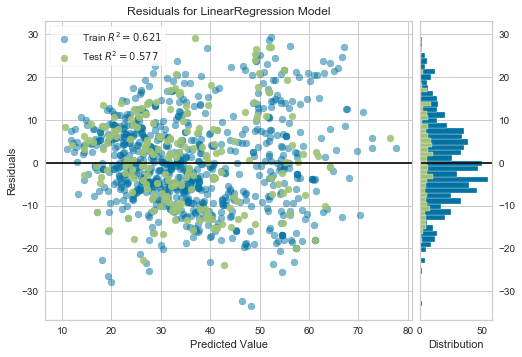

In [7]:
from yellowbrick.regressor import ResidualsPlot

viz = ResidualsPlot(LinearRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

### Coefficient of Determination

Two appropriate evaluation measures of model performance are:

- mean square error: the average residuals as computed by the cost function 
- mean absolute error: metric that is more robust to outliers 

Generally we want to score our models with a metric that is $\in [0,1]$ for easy comparability across different feature sets. The $R^2$ (pronounced R-squared, whose title is coefficient of determination) is the ratio of explained variance from the model to the total variance of the model. 

It can be interpreted as the "goodness of fit" of the model to the data. 

![Explained Variance](figures/explained_variance.png)

In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    
    print("R2: {:0.3f} MSE: {:0.2f} MAE: {:0.2f}".format(
        r2_score(y_test, y_hat),
        mean_squared_error(y_test, y_hat),
        mean_absolute_error(y_test, y_hat),
    ))
    
    
evaluate_model(LinearRegression())

R2: 0.577 MSE: 114.29 MAE: 8.69


**TODO**: Draw two graphs with high and low $R^2$ values. 

### Multicollinearity

Occurs when one independent variable can be linearly predicted from the others. 

- May cause $X^TX$ to not be invertible (when there is enough data for the number of features)
- May cause large changes in coefficients when data or features is added. 
- Inflates the variance of at least one coefficient 
- Can invert the sign of some coefficients

May be able to detect multicollinearity through feature analysis: Rank2D

/Users/benjamin/Workspace/ddl/navyfcu/venv/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


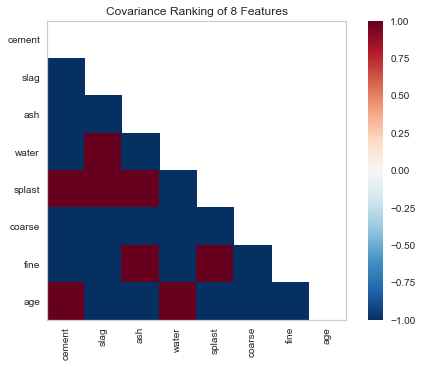

In [9]:
from yellowbrick.features import Rank2D 

viz = Rank2D(algorithm='covariance')
viz.fit_transform(X,y)
viz.poof()

## Regularization

- In high-dimensional space, particularly with very sparse data - different realizations of models can vary widely either due to the increased _complexity_ of the model. 
- Occurring for multiple reasons (e.g. multicollinearity), the symptom is dramatic differences in the weights of the linear model. 
- Regularization introduces a parameter based on the norm of the weights to **penalize** complexity during the fitting process. 

> NOTE: The penalty parameter is often called $\alpha$, not to be confused with the learning rate in gradient descent.

### Vector Norms

- Describes the length of the vector 
- $L^1$: sum of the absolute values of components ($|x|_1$)
- $L^2$: Euclidean distance from the origin ($|x|$)
- $L^\infty$: maximal absolute value component ($|x|_\infty$)

In [10]:
import numpy.linalg as la 

vec = np.array([-10, 3, 3, -5, -3, -2, 1, 9, 3, 4, 6, -8])

l1  = la.norm(vec, 1)
print(l1)

l2  = la.norm(vec, 2)
print(l2)

lin = la.norm(vec, np.inf)
print(lin)

57.0
19.05255888325765
10.0


### Hypothesis

![Hypothesis](figures/regularization_hypothesis.png)

I am going to give an intuitive (and probably a simplistic) explanation here, a detailed answer can be found in [What is the difference between L1 and L2 regularization](https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization)?

L1 & L2 regularization add constraints to the optimization problem. The curve H0 is the hypothesis. The solution to this system is the set of points where the H0 meets the constraints. 

Now, in the case of L2 regularization, in most cases, the the hypothesis is tangential to the ||w||_2. The point of intersection has both x1 and x2 components. On the other hand, in L1, due to the nature of ||w||_1, the viable solutions are limited to the corners, which are on one axis only - in the above case x1. Value of x2 = 0. This means that the solution has eliminated the role of x2 leading to sparsity. Extend this to higher dimensions and you can see why L1 regularization leads to solutions to the optimization problem where many of the variables have value 0. 

In other words, L1 regularization leads to sparsity.


## Ridge Regression

- Uses the **L2 Norm** to prevent overfit/collinearity by penalizing the size of the coefficients
- Coefficients are shrunk evenly together toward zero by modifying the cost function as follows:

$$min_w\sum(Xw-y)^2+\alpha\sum w^2$$

- The hyperparameter, $\alpha>0$ is the complexity parameter that controls shrinkage. The larger $\alpha$ is, the more robust the mode is to collinearity. 

> With respect to the bias/variance trade-off: the larger $\alpha$ is, the lower the complexity; therefore lower error due to variance.

![Ridge Alpha](figures/ridge_alpha.png)

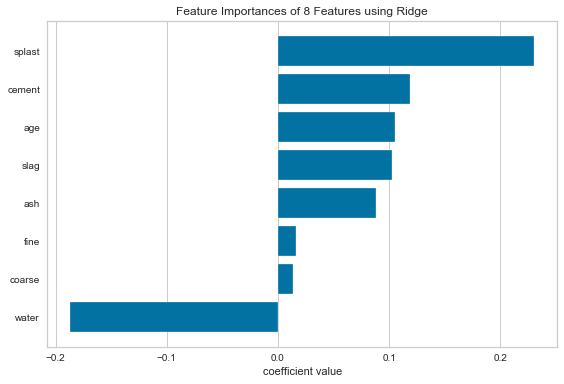

In [11]:
from sklearn.linear_model import Ridge
from yellowbrick.features import FeatureImportances

model = FeatureImportances(Ridge(alpha=0.5), relative=False)
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.poof()

## LASSO Regression

- The more features in the model, the more sparse our data is because there is more space in the model. 
- Lasso uses the **L1 Norm** to remove parameters by quickly shrinking them to zero, thereby reducing the sparsity of the model. The norm is incorporated into the cost function as follows: 

$$min_w \frac{1} {2n} \sum(Xw-y)^2+\alpha|w|_1$$

- Lasso prefers prefers fewer parameters, the larger $\alpha$ is, the fewer parameters are included. 

> With respect to the bias/variance trade-off: less features means less complexity, therefore the larger $\alpha$ the lower the error due to variance.

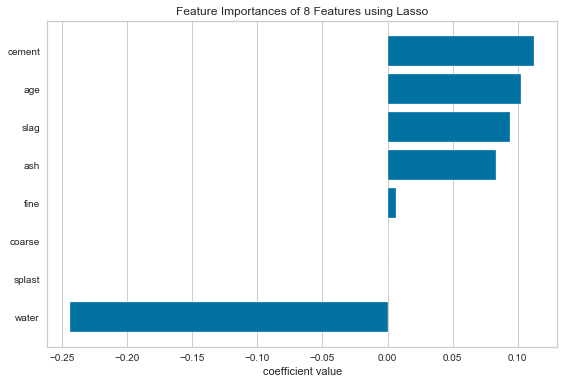

In [12]:
from sklearn.linear_model import Lasso 

model = FeatureImportances(Lasso(alpha=5.5), relative=False)
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.poof()

## ElasticNet Regression

- Regularizes with both **L1** _and_ **L2** norms. 
- Allows learning a sparse model like Lasso, while maintaining regularization properties of ridge. 
- Regularization coefficients are $\alpha$ (L2) and $\rho$ (L1 Ratio):

$$min_w \frac{1} {2n} \sum(Xw-y)^2+\alpha\rho|w|_1+\frac{\alpha(1-\rho)}{2}|w|_2$$

ElasticNet is useful when multiple features are correlated with each other (Lasso will pick one at random, while ElasticNet will pick both). ElasticNet also inherits Ridge's stability. 

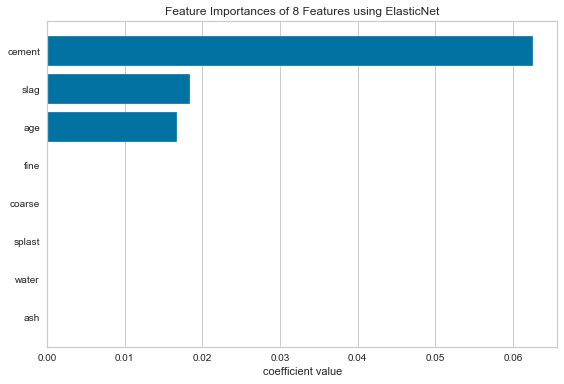

In [13]:
from sklearn.linear_model import ElasticNet 

model = FeatureImportances(ElasticNet(alpha=15.5, l1_ratio=15.1), relative=False)
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.poof()

## Alpha Selection

For regularization methods, selection of Alpha is very important. This is usually done by a specialized form of grid search (optimized for the particular model), finding the alpha that _maximizes_ the cross-validation score. 

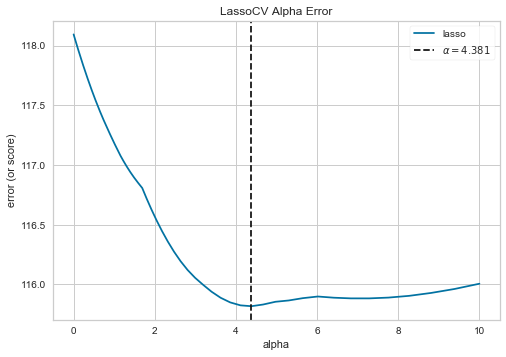

In [14]:
from yellowbrick.regressor import AlphaSelection 
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

alphas = np.logspace(-10, 1, 400)

viz = AlphaSelection(LassoCV(alphas=alphas))
viz.fit(X, y)
viz.poof()

## Other Regression Models

Just a small note that there are many other regression models:

- Most classification models also have an associated regression model (e.g. for the models we discuss for classification). 
- LARS Lasso 
- Multi-Task Lasso/ElasticNet
- Orthogonal Matching Pursuit 
- RANSAC
- &hellip; and more! 

Make sure that for tough to solve regression problems, you add these to your search space as well.